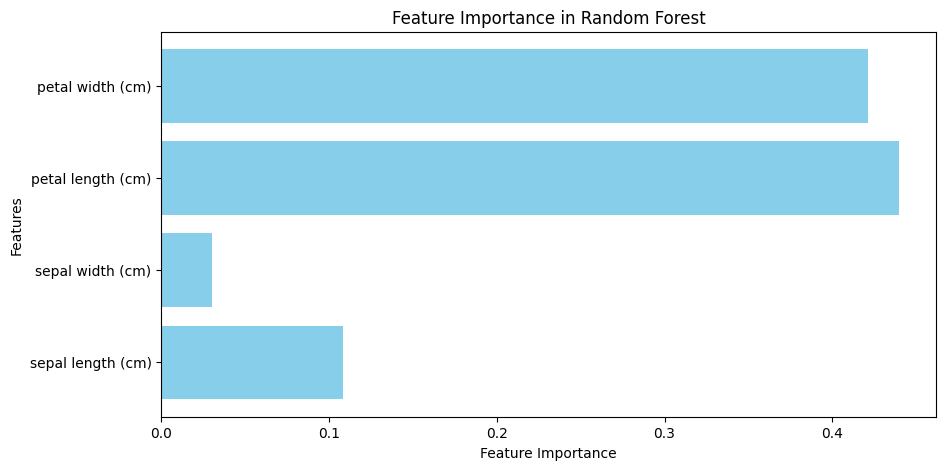

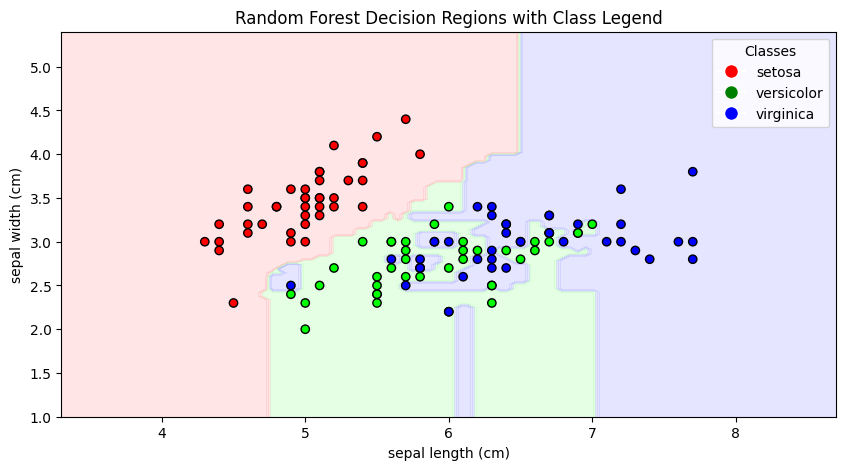

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


In [ ]:
# Import necessary libraries

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import numpy as np
from matplotlib.colors import ListedColormap

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot the feature importance
feature_importance = random_forest.feature_importances_
features = iris.feature_names

plt.figure(figsize=(10, 5))
plt.barh(features, feature_importance, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

# Scatter plot of two features with decision regions
X_plot = X_train[:, :2]  # Only two features for 2D visualization
y_plot = y_train

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_plot, y_plot)

# Create a mesh grid
x1, x2 = np.meshgrid(np.linspace(X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1, 100),
					 np.linspace(X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1, 100))
grid = np.c_[x1.ravel(), x2.ravel()]

preds = forest_clf.predict(grid).reshape(x1.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 5))
cmap_background = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_points = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
plt.contourf(x1, x2, preds, alpha=0.3, cmap=cmap_background)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, cmap=cmap_points, edgecolor="k")

# Adding the legend for the classes
class_labels = iris.target_names
plt.legend(handles=[
	plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label=class_labels[0]),
	plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label=class_labels[1]),
	plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=class_labels[2])
], title="Classes", loc="upper right")

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Random Forest Decision Regions with Class Legend")
plt.show()

# Display classification report and accuracy
classification_report_output = classification_report(y_test, y_pred, target_names=iris.target_names)
print(classification_report_output)
print(f"Accuracy: {accuracy}")

